# 13.7  Modelling interaction terms 

Suppose we fit a multivariable linear regression model relating the outcome of weight to the covariates age, sex and height, for adults in the general population. In this case, the estimated regression coefficient for height represents the effect of a unit increase in height on weight in people of the same age and sex. The model assumes that the coefficient relating weight to height is the same for all people of all ages and sexes. For example, that it is the same for twenty year old men as in ninety-three year old women. But this is not necessarily true! It could be that the slope of the association between weight and height differs by sex and by age. If this is the case, we say there is an **interaction** between height and sex and between height and age. 

The term **interaction** is used to describe situations in which the relationship between $Y$ and $X$ differs according to the level of one or more other covariates.




## 13.7.1 Linear regression with an interaction term 

Suppose we wish to relate an outcome ($Y$) to two covariates ($X_1$ and $X_2$), but we want to allow the association between $Y$ and $X_1$ to differ according to the value of $X_2$. To allow for this we fit an interaction model that contains an additional variable ($X_3$) that is the product of $X_1$ and $X_2$: 

$$
y_i =  \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \beta_3 x_{3i} + \epsilon_i \text{ where }  \epsilon_i \overset{\small{iid}}{\sim} N(0, \sigma^2).
$$ 

+ $y_i$ = value of the outcome for the $i^{th}$ observation
+ $x_{1i}$ = value of the first covariate for the $i^{th}$ observation
+ $x_{2i}$ =  value of the second covariate for the $i^{th}$ observation
+ $x_{3i}$ = $x_{1i} \times x_{2i}$


To understand why this model allows the association between $Y$ and $X_1$ to vary according to $X_2$, we can consider the form of the equation when we fix $X_2$ to have a particular value, say $X_2=k$. In this situation the relationship between $Y$ and $X_1$ is as follows:

$$
y_i = (\beta_0 + \beta_2k) + (\beta_1 + \beta_3k)x_{1i} + \epsilon_i.
$$ 

In other words, when $x_2=k$ the relationship between $Y$ and $X_1$ is a linear one with both slope and intercept dependent upon $k$. The intercept is $\beta_0+\beta_2k$ and the slope is $\beta_1 +  \beta_3k$. 

By allowing the association between $Y$ and $X_1$ to vary according to $X_2$, we have also allowed the slope for the association between $Y$ and $X_2$ to vary according to $X_1$. If we look at the form of the model when $X_1$ takes particular value, say $X_1=m$, we find:

$$
y_i = (\beta_0+\beta_1m) + (\beta_2+\beta_3m)x_{2i} + \epsilon_i.
$$ 

Again, the relationship between $Y$ and $X_2$ is a linear one with both slope and intercept dependent upon $m$. 

## 13.7.2 Interaction between a continuous variable and a binary variable

The interaction model is particularly easy to interpret when one of the covariates (say $X_2$) is a binary, taking the values 0 and 1 (i.e. a dummy variable). The linear regression model then becomes:

$$
\begin{align}
&y_i = \beta_0 + \beta_1x_{1i} + \epsilon_i \text{ when } x_2=0\\ 
&y_i = (\beta_0 + \beta_2) + (\beta_1+\beta_3)x_{1i} + \epsilon_i \text{ when } x_2=1 
\end{align}
$$

The interpretation of each of the parameters is as follows. 

+ $\beta_0$ is the intercept when $X_2=0$
+ $\beta_0 + \beta_2$ is the intercept when $X_2=1$ 
+ $\beta_2$ is the difference in intercepts between the two groups defined by $X_2$. 

+ $\beta_1$ is the slope when $X_2=0$
+ $\beta_1+\beta_3$ is the slope when $X_2=1$
+ $\beta_3$ is the difference in slopes between the two groups defined by $X_2$. 

*Example.* To demonstrate the impact of adding an interaction term, we will consider two models: (1) relating birthweight ($Y$) to length of pregnancy ($X_1$) and mother's smoking status ($X_2$) and (2) relating birthweight ($Y$) to length of pregnancy ($X_1$), mother's smoking status ($X_2$) and their interaction ($X_3$). In these models, $X_2=1$ indicates that the mother smokes and $X_2=0$ indicates that the mother does not smoke. 

We first consider the model with no interaction term. The code below defines the model in R, summarises the results and produces a scatter plot of birthweight against gestational days, with the fitted values superimposed. The blue points (and line) on the scatter plot are observations in the group of babies whose mothers do not smoke and the red points (and line) are observations in the group of babies whose mothers do smoke.


Call:
lm(formula = data$Birth.Weight ~ data$Gestational.Days + factor(data$Maternal.Smoker2))

Residuals:
    Min      1Q  Median      3Q     Max 
-50.789 -11.035  -0.211  10.053  52.412 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -3.18492    8.32945  -0.382    0.702    
data$Gestational.Days           0.45117    0.02968  15.200   <2e-16 ***
factor(data$Maternal.Smoker2)1 -8.37440    0.97346  -8.603   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.25 on 1171 degrees of freedom
Multiple R-squared:  0.2157,	Adjusted R-squared:  0.2143 
F-statistic:   161 on 2 and 1171 DF,  p-value: < 2.2e-16


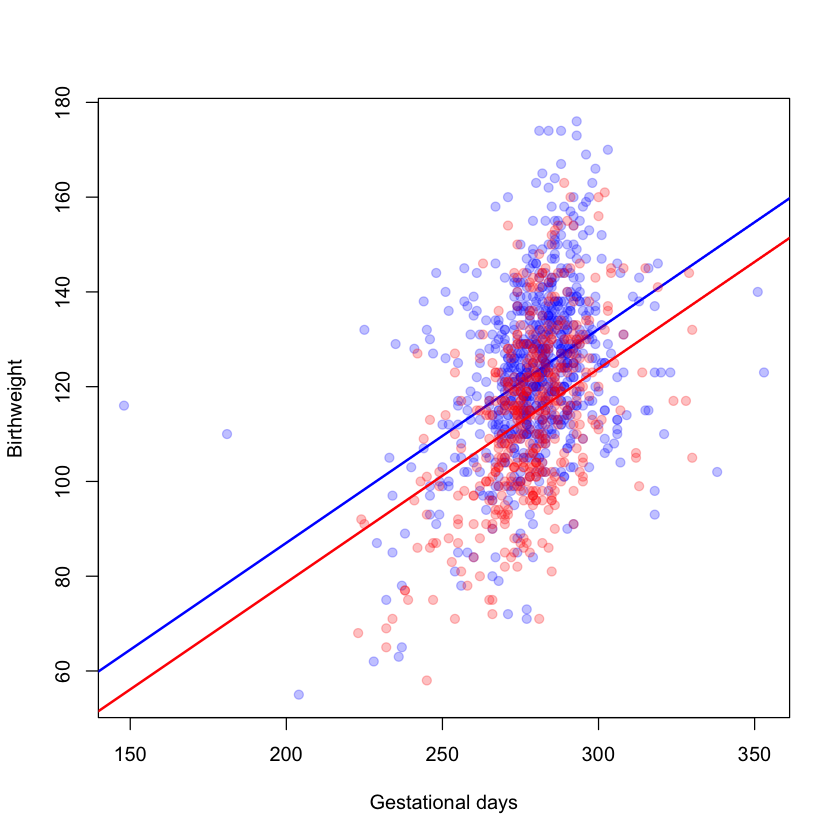

In [1]:
data<- read.csv('https://www.inferentialthinking.com/data/baby.csv')
#Define a dummy variable for maternal.smoker
data$Maternal.Smoker2<-0
data$Maternal.Smoker2[data$Maternal.Smoker=="True"]<-1

#Model without the interaction term
no_int_model<-lm(data$Birth.Weight~data$Gestational.Days+factor(data$Maternal.Smoker2))
summary(no_int_model)

#Scatterplot
plot(x = data[data$Maternal.Smoker2 == 0, ]$Gestational.Days, y = data[data$Maternal.Smoker2 == 0, ]$Birth.Weight, 
     pch = 19, xlab = "Gestational days", ylab = "Birthweight", col = rgb(red = 0, green = 0, blue = 1, alpha = 0.25))
abline(a = no_int_model$coefficients[1], b = no_int_model$coefficients[2], col = "blue", lwd = 2)
points(x = data[data$Maternal.Smoker2 == 1, ]$Gestational.Days, y = data[data$Maternal.Smoker2 == 1, ]$Birth.Weight, 
       col = rgb(red = 1, green = 0, blue = 0, alpha = 0.25), pch = 19)
abline(a = coef(no_int_model)[1] + coef(no_int_model)[3], b = coef(no_int_model)[2], 
       col = "red", lwd = 2)

As can be seen from the above figure, the fitted values from the model with no interaction term form two straight lines with a common slope 0.45 ounces and intercepts -3.18 ounces for the non-smoking group and -3.18-8.37=-11.55 ounces for the smoking group. This type of model (no interactions) is sometimes known as a **parallel lines** regression model, because it restricts the lines to be parallel. It permits adjustment of the effect of one covariate for the effects of others, but forces the effects of a unit change in each covariate to be constant, whatever the level of the other covariate. This restriction is not appropriate if the slope effect of one covariate depends on the value of another covariate. Adding an interaction term removes this restriction. 

Below, we fit the second model which includes an interaction term, and produce a second scatter plot with the fitted values from our new model superimposed. 


Call:
lm(formula = data$Birth.Weight ~ data$Gestational.Days + factor(data$Maternal.Smoker2) + 
    data$int1)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.023 -11.078  -0.084   9.995  50.499 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     19.63964   10.29098   1.908 0.056580 .  
data$Gestational.Days            0.36962    0.03671  10.069  < 2e-16 ***
factor(data$Maternal.Smoker2)1 -72.68713   17.23243  -4.218 2.65e-05 ***
data$int1                        0.23085    0.06176   3.738 0.000194 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.16 on 1170 degrees of freedom
Multiple R-squared:  0.2249,	Adjusted R-squared:  0.2229 
F-statistic: 113.2 on 3 and 1170 DF,  p-value: < 2.2e-16


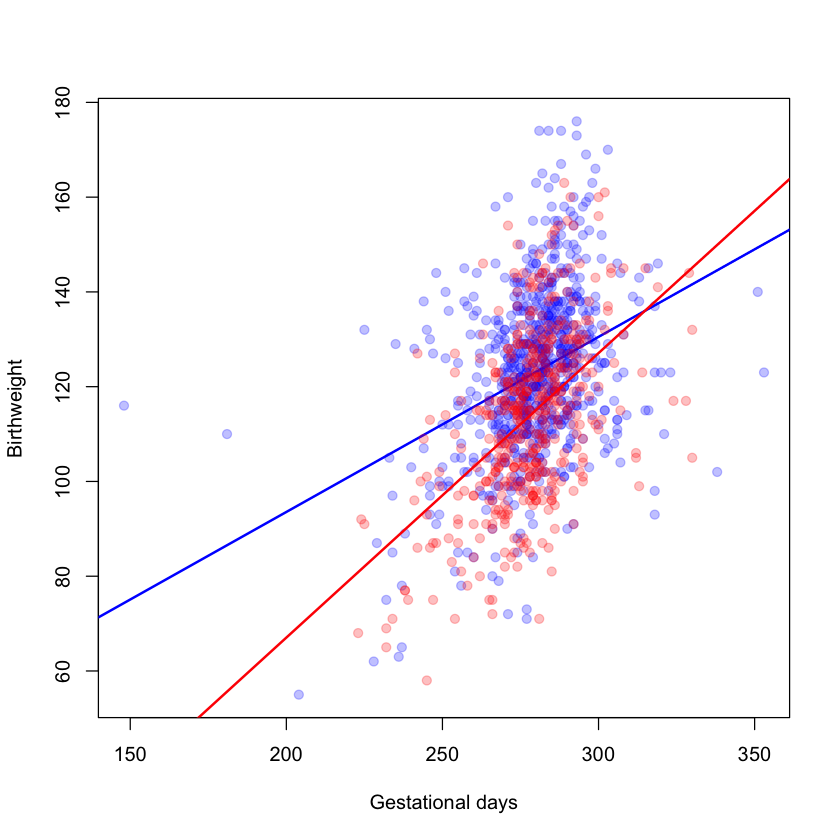

In [2]:
#Create the interaction term
data$int1<-data$Gestational.Days*data$Maternal.Smoker2

#Include the interaction term in our model
int_model1<-lm(data$Birth.Weight~data$Gestational.Days+factor(data$Maternal.Smoker2)+data$int1)
summary(int_model1)

#Scatter plot
plot(x = data[data$Maternal.Smoker2 == 0, ]$Gestational.Days, y = data[data$Maternal.Smoker2 == 0, ]$Birth.Weight, 
     pch = 19, xlab = "Gestational days", ylab = "Birthweight", col = rgb(red = 0, green = 0, blue = 1, alpha = 0.25))
abline(a = int_model1$coefficients[1], b = int_model1$coefficients[2], col = "blue", lwd = 2)
points(x = data[data$Maternal.Smoker2 == 1, ]$Gestational.Days, y = data[data$Maternal.Smoker2 == 1, ]$Birth.Weight, 
       col = rgb(red = 1, green = 0, blue = 0, alpha = 0.25), pch = 19)
abline(a = coef(int_model1)[1] + coef(int_model1)[3], b = coef(int_model1)[2] + coef(int_model1)[4], 
       col = "red", lwd = 2)


In our new model, the intercept and slope among the non-smoking group are 19.64 ounces and 0.37 ounces respectively. The intercept and slope among the smoking group are 19.64-72.69=-53.05 ounces and  0.37+0.23=0.60 ounces respectively. The interaction term has $p$=0.0001, so there is evidence that the slopes are different. 
